# Finding k

You have been analyzing the pricing data on one of the stocks your firm owns. Specifically, you were examining the relationship between the day's trading volume and the spread between the high and low trading price. Use the elbow method to determine the optimal number of clusters, `k`, that should be used to segment these trades. Once the elbow curve has been established, evaluate the two most likely values for `k` using the K-means algorithm and a scatter plot.


In [16]:
# Import the modules
import pandas as pd
import hvplot.pandas as plot
from pathlib import Path
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

## Read in the `stock_data.csv` file from the Resources folder and create a DataFrame. Set the “date” column to create the DatetimeIndex. Be sure to include parameters for `parse_dates` and `infer_datetime_format`.

In [21]:
# Read in the CSV file as a Pandas DataFrame
file_path = Path("..\Resources\stock_data.csv")
spread_df = pd.read_csv(file_path, 
                       parse_dates = ["date"],
                       infer_datetime_format = True,
                       index_col = ["date"])

# Review the DataFrame
spread_df
spread_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2009-04-30 to 2019-04-29
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   close          2516 non-null   float64
 1   volume         2516 non-null   int64  
 2   open           2516 non-null   float64
 3   high           2516 non-null   float64
 4   low            2516 non-null   float64
 5   returns        2516 non-null   float64
 6   hi_low_spread  2516 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 157.2 KB


C:\Users\ppate\AppData\Local\Temp\ipykernel_29184\3273326780.py:3: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  spread_df = pd.read_csv(file_path,


## Create two lists: one to hold the list of inertia scores and another for the range of k values (from 1 to 11) to analyze.

In [22]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1,11))

## Using a for-loop to evaluate each instance of k, define a K-means model, fit the K-means model based on the scaled DataFrame, and append the model’s inertia to the empty inertia list that you created in the previous step.

In [24]:
# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the KMeans model instance
for i in k:
    k_model = KMeans(n_clusters = i, random_state = 1)
    k_model.fit(spread_df)
    inertia.append(k_model.inertia_)

C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

## Store the values for k and the inertia in a Dictionary called `elbow_data`. Use `elbow_data` to create a Pandas DataFrame called `df_elbow`.

In [33]:
# Create a Dictionary that holds the list values for k and inertia
elbow_data = {"k" : k, "inertia" : inertia}

# Create a DataFrame using the elbow_data Dictionary
df_elbow =  pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow

,k,inertia
0,1,2.835703e+18
1,2,9.903144e+17
2,3,4.999629e+17
3,4,3.062100e+17
4,5,2.104100e+17
5,6,1.537686e+17
6,7,1.101960e+17
7,8,8.448857e+16
8,9,6.650685e+16
9,10,5.220823e+16


## Using hvPlot, plot the `df_elbow` DataFrame to visualize the elbow curve.

<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

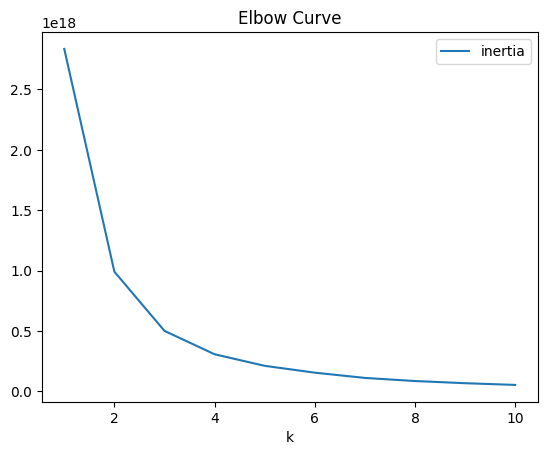

In [41]:
# Plot the DataFrame
df_elbow.plot(
    title = "Elbow Curve", 
    x = "k",
    y = "inertia",)

## Perform the following tasks for each of the two most likely values of `k`:

* Define a K-means model using `k` to define the clusters, fit the model, make predictions, and add the prediction values to a copy of the scaled DataFrame and call it `spread_predictions_df`.

* Plot the clusters. The x-axis should reflect the "hi_low_spread", and the y-axis should reflect the "close" price.

In [43]:
# Define the model with the lower value of k clusters
# Use a random_state of 1 to generate the model
model =  KMeans(n_clusters = 3, random_state = 1)

# Fit the model
model.fit(spread_df)

# Make predictions
k_lower =  model.predict(spread_df)

# Create a copy of the DataFrame and name it as spread_df_predictions
spread_df_predictions =  spread_df.copy()

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_lower'] = k_lower

C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [49]:
# Review the dataframe
spread_df_predictions

,close,volume,open,high,low,returns,hi_low_spread,clusters_lower
date,,,,,,,,
2009-04-30,3.61,18193730,3.55,3.73,3.53,0.028490,0.20,0
2009-05-01,3.82,16233940,3.55,3.90,3.55,0.058172,0.35,0
2009-05-04,4.26,21236940,3.90,4.30,3.83,0.115183,0.47,0
2009-05-05,4.32,16369170,4.36,4.39,4.11,0.014085,0.28,0
2009-05-06,4.31,15075630,4.45,4.45,4.12,-0.002315,0.33,0
...,...,...,...,...,...,...,...,...
2019-04-23,27.97,41583740,28.18,28.49,27.79,-0.007452,0.70,2
2019-04-24,28.46,51487330,28.10,28.85,27.93,0.017519,0.92,2
2019-04-25,27.66,56709000,28.67,28.86,27.36,-0.028110,1.50,2


KeyError: 'hi_low_spread'

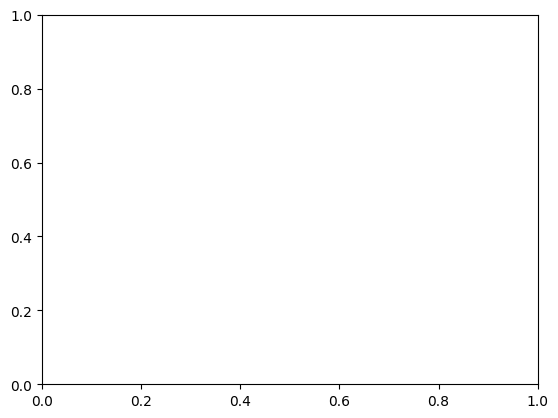

In [51]:
# Plot the clusters
spread_df_predictions.plot.scatter(
    x = "hi_low_spread", 
    y = "close",
    by = "clusters_lower")

In [52]:
# Define the model with the higher value of k clusters
# Use a random_state of 1 to generate the model
model =  KMeans(n_clusters = 5, random_state = 1)

# Fit the model
model.fit(spread_df)

# Make predictions
k_higher =  model.predict(spread_df)

# Add a class column with the labels to the spread_df_predictions DataFrame
spread_df_predictions['clusters_higher'] = k_higher

C:\Users\ppate\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KeyError: 'hi_low_spread'

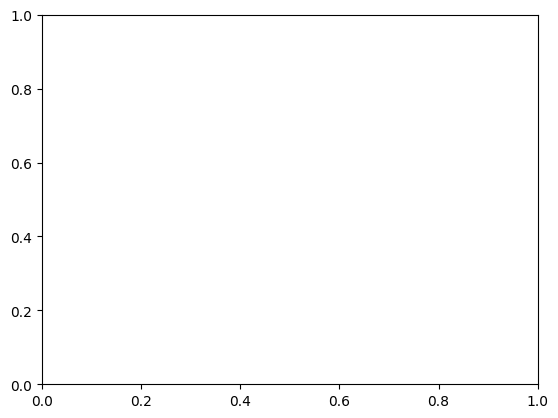

In [53]:
# Plot the clusters
spread_df_predictions.plot.scatter(
    x = "hi_low_spread",
    y = "close",
    by = "clusters_higher")

## Answer the following question

* Considering the plot, what’s the best number of clusters to choose, or value of k?
    *  > (Your Answer Here)